Neural Networks:



In [4]:
import matplotlib.pyplot as plt

In [1]:
# a simple neural network with one hidden layer: 2 inputs, 3 hidden neurons, 1 output neuron

import pandas as pd
import numpy as np

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize the weights
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        
        # Initialize the biases
        self.biases1 = np.zeros((1, self.hidden_size))
        self.biases2 = np.zeros((1, self.output_size))
        
    def forward(self, X):
        # Calculate the hidden layer output
        self.hidden_output = sigmoid(np.dot(X, self.weights1) + self.biases1)
        
        # Calculate the output layer output
        self.output = sigmoid(np.dot(self.hidden_output, self.weights2) + self.biases2)
        
        return self.output
    
    def backward(self, X, y, learning_rate):
        # Calculate the gradients
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        
        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update the weights and biases
        self.weights2 += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.weights1 += np.dot(X.T, hidden_delta) * learning_rate
        
        self.biases2 += np.sum(output_delta, axis=0) * learning_rate
        self.biases1 += np.sum(hidden_delta, axis=0) * learning_rate
        
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
    def predict(self, X):
        return self.forward(X)




Try it on the UCI data:

digits dataset, recognizing handwritten digits.
Using the code given in the UCI repo to import the dataset.

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
#print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [31]:
optical_recognition_of_handwritten_digits.data

{'ids': None,
 'features':       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
 0              0           1           6          15          12           1   
 1              0           0          10          16           6           0   
 2              0           0           8          15          16          13   
 3              0           0           0           3          11          16   
 4              0           0           5          14           4           0   
 ...          ...         ...         ...         ...         ...         ...   
 5615           0           0           4          10          13           6   
 5616           0           0           6          16          13          11   
 5617           0           0           1          11          15           1   
 5618           0           0           2          10           7           0   
 5619           0           0          10          14           8           1   
 


Now, show the first picture:

In [26]:
optical_recognition_of_handwritten_digits.data['features'].loc[0,:]

Attribute1      0
Attribute2      1
Attribute3      6
Attribute4     15
Attribute5     12
               ..
Attribute60    14
Attribute61     7
Attribute62     1
Attribute63     0
Attribute64     0
Name: 0, Length: 64, dtype: int64

In [27]:
pic_1st_array = optical_recognition_of_handwritten_digits.data['features'].loc[0,:].to_numpy()

# Reshape the array into an 8x8 matrix
matrix_8x8_first_pic = pic_1st_array.reshape(8, 8)

<Figure size 640x480 with 0 Axes>

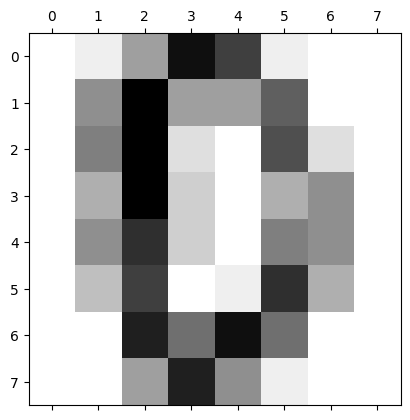

In [28]:
plt.gray()
plt.matshow(matrix_8x8_first_pic, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It seems the first phote is a 0.

check out the Target:

In [42]:
optical_recognition_of_handwritten_digits.data['targets'].loc[0,:]

class    0
Name: 0, dtype: int64

It is indeed 0! 

Now test the simple three layer n-n on it.

In [48]:
# Create a neural network instance
nn = NeuralNetwork(input_size=64, hidden_size=3, output_size=1)


In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
type(y)

pandas.core.frame.DataFrame

Now convert to numpy:

In [56]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

    Input Layer: The size of the input layer should match the number of features in your dataset. So, for your case, you would have 64 neurons in the input layer.

    Hidden Layer: The number of neurons in the hidden layer is a key parameter to tune. A common practice is to start with a number between the size of the input layer and the size of the output layer. Since you have 64 input features, you might start with a hidden layer size that is a fraction or multiple of 64. A typical starting point could be in the range of 32 to 128 neurons. The exact number can be determined through experimentation: start with a lower number to avoid overfitting and increase it if the network's performance is not satisfactory.

    Output Layer: The size of the output layer depends on the type of task. For a regression task, it's usually 1 neuron (for a single continuous output). For a classification task, it's often the number of classes (for binary classification, it's 1 neuron; for multi-class classification, it's equal to the number of classes).

In [66]:
# Create a neural network instance
#nn = NeuralNetwork(input_size=64, hidden_size=3, output_size=1)
# Create a neural network instance


nn = NeuralNetwork(input_size=64, hidden_size=128, output_size=1)
# Train the neural network
nn.train(X_arr, y_arr, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print(predictions)

/tmp/ipykernel_20191/4223900226.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [67]:
predictions[0]

array([1.])

3 layer neuron-network accuracy is:

In [68]:
# print the accuracy
print(np.mean(predictions == y))

0.10160142348754449


Basically, it predicts everything as 1.


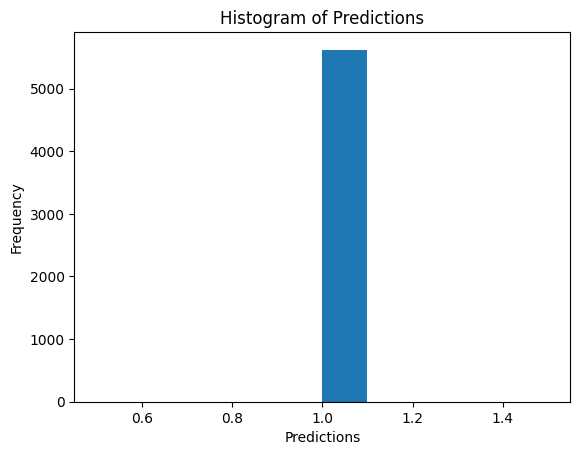

In [69]:
import matplotlib.pyplot as plt

# Create a histogram of predictions
plt.hist(predictions, bins=10)
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')
plt.show()


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # or softmax for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [75]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(64,)))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=10, batch_size=32)  # You can adjust epochs and batch_size


Epoch 1/10


141/141 [==============================] - 2s 5ms/step - loss: -11130.6748 - accuracy: 0.1041
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: -224380.4062 - accuracy: 0.1043
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: -1139547.7500 - accuracy: 0.1043
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: -3276569.2500 - accuracy: 0.1043
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: -7068105.5000 - accuracy: 0.1043
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: -12905545.0000 - accuracy: 0.1043
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: -21117054.0000 - accuracy: 0.1043
Epoch 8/10
141/141 [==============================] - 1s 4ms/step - loss: -31956606.0000 - accuracy: 0.1043
Epoch 9/10
141/141 [==============================] - 0s 4ms/step - loss: -45637248.0000 - accuracy: 0.1043
Epoch 10/10
141/141 [==========================

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

36/36 [==============================] - 0s 3ms/step - loss: -74871768.0000 - accuracy: 0.0907
Test Accuracy: 0.09074733406305313


Oops!, seems to be very inaccurate!